In [6]:
import pandas as pd
import numpy as np 
import joblib
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
fileTest = pd.read_csv('D:\\Ido_study\\עבודות הגשה והרצאות\\שנה ג סמסטר א\\מבוא ללמידת מכונה\\פרוייקט מסכם\\קבצי EXCL\\test.csv')
fileTrain = pd.read_csv('D:\Ido_study\עבודות הגשה והרצאות\\שנה ג סמסטר א\\מבוא ללמידת מכונה\\פרוייקט מסכם\\קבצי EXCL\\train.csv')

In [8]:
X_train = fileTrain.drop(labels=['HeartDiseaseorAttack','NoDocbcCost','CholCheck'], axis=1)
X_test = fileTest.drop(labels=['HeartDiseaseorAttack','NoDocbcCost','CholCheck'], axis=1)
Y_train = fileTrain['HeartDiseaseorAttack']
Y_test = fileTest['HeartDiseaseorAttack']

In [9]:
model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

# Training of the algorithm
model.fit(X_train,Y_train)

#save the model
filename ='myneuralmodel.joblib'
joblib.dump(model,filename)

# Prediction
predict_test = model.predict(X_test)

In [5]:
from sklearn import metrics

#accuracy
print('Accuracy=',metrics.accuracy_score(Y_test,predict_test))

# features importance
#print(model.feature_importances_)


print('F1= ',metrics.f1_score(Y_test,predict_test));
cf_matrix = metrics.confusion_matrix(Y_test,predict_test)

Accuracy= 0.908349101229896
F1=  0.19092912655144412


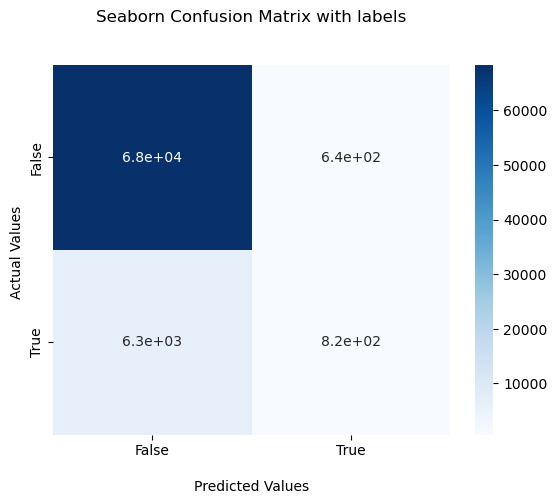

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     74637
           1       0.12      0.56      0.19      1467

    accuracy                           0.91     76104
   macro avg       0.55      0.74      0.57     76104
weighted avg       0.97      0.91      0.94     76104



In [6]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print(metrics.classification_report(predict_test,Y_test))
exit(0)